In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from scipy.spatial.distance import squareform, pdist

sns.set(style='whitegrid', context='notebook', palette='Set2')

In [18]:
# read CSV
df_data  = pd.read_csv('../../data/some.csv')
df_data = df_data.drop(columns=['Unnamed: 0'])

In [19]:
df_data.head()

,index,id,new_frame,frame,wx,wz,vel,dist,minD
0,0,0,1,26.250000,-85.809775,660.082000,15.618800,8.356058,NaN
1,1,0,2,49.833333,-62.801800,682.939000,41.255759,32.431611,NaN
2,2,0,3,67.142857,-74.171171,665.800143,35.645760,20.567037,2653.531611
3,3,0,4,90.230769,-217.065846,489.702846,294.673615,226.779951,2653.531611
4,4,0,5,103.000000,-257.003714,370.991429,294.260843,125.249487,2503.698304


In [29]:
def drop_outlier(df):
#   for i, col in df.iteritems():
    #四分位数
    q1 = df['vel'].quantile(.25)
    q3 = df['vel'].quantile(.75)

    iqr = q3 - q1 #四分位範囲

    #外れ値の基準点
    outlier_min = q1 - (iqr) * 1.5
    outlier_max = q3 + (iqr) * 1.5

    #範囲から外れている値を除く
    df['vel'][df['vel'] < outlier_min] = None
    df['vel'][df['vel'] > outlier_max] = None

drop_outlier(df_data)
df_data = df_data.dropna()

/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


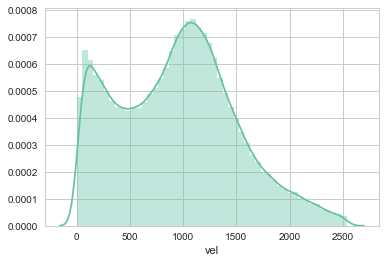

In [30]:
sns.distplot(df_data['vel'])

In [31]:
df_data.describe()

,index,id,new_frame,frame,wx,wz,vel,dist,minD
count,167459.000000,167459.000000,167459.000000,1.674590e+05,167459.000000,167459.000000,167459.000000,167459.000000,167459.000000
mean,126910.703295,121927.147367,43367.921623,8.673666e+05,749.163984,4860.887108,941.980543,534.680155,2293.985367
std,72066.920873,72600.714900,24618.495094,4.923698e+05,1478.420510,1746.577577,557.976594,330.453496,1177.502937
min,2.000000,0.000000,3.000000,6.714286e+01,-3711.220000,250.612000,0.221536,0.147691,0.333270
25%,66363.500000,63050.000000,22898.500000,4.579764e+05,-358.796556,3647.497583,485.832976,261.515984,1432.523679
50%,121266.000000,107629.000000,40387.000000,8.077497e+05,828.670611,4857.422000,958.826088,517.997374,2202.737148
75%,188527.500000,180189.000000,63929.000000,1.278588e+06,1890.156478,5930.157500,1304.974822,754.734749,3084.836661
max,265945.000000,281987.000000,94735.000000,1.894701e+06,5119.310000,9399.400000,2540.131609,1538.830135,5681.783805


平均

In [38]:
people_mean = df_data.groupby('id').mean()
people_max = df_data.groupby('id').max()
people_min = df_data.groupby('id').min()

In [55]:
people = pd.DataFrame()

In [78]:
# people['minV'] = people_min['vel']
# people['maxV'] = people_max['vel']
people['meanV'] = people_mean['vel']
people['minD'] = people_mean['minD']

クラスタリング

In [81]:
remove_n = 50000 #167459.000000/2
drop_indices = np.random.choice(people.index, remove_n, replace=False)
people_subset = people.drop(drop_indices)

In [82]:
from sklearn.decomposition import PCA
import pylab as pl
from sklearn import mixture

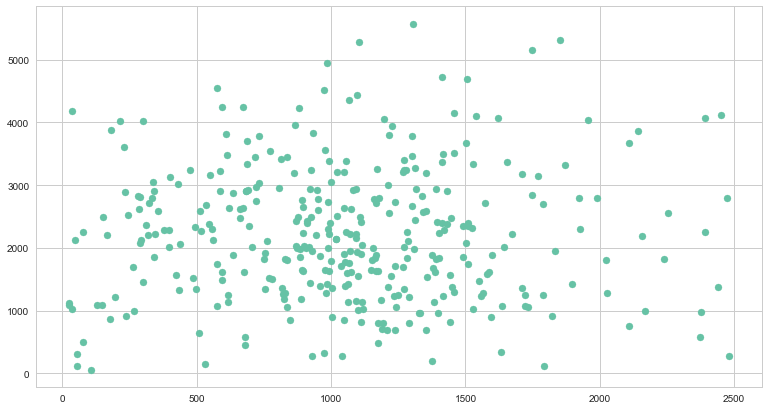

In [84]:
# pca = PCA(n_components=2)
# pca.fit(people_subset)
# X_reduced = pca.transform(people_subset)

fig = plt.figure(figsize=(13,7))
pl.scatter(people_subset['meanV'], people_subset['minD']);

/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users

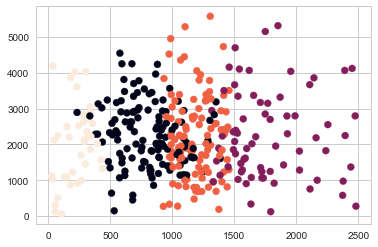

In [86]:
em = mixture.GMM(n_components=4)
em.fit(people_subset)
y_pred_em = em.predict(people_subset)
pl.scatter(people_subset['meanV'], people_subset['minD'], c=y_pred_em);

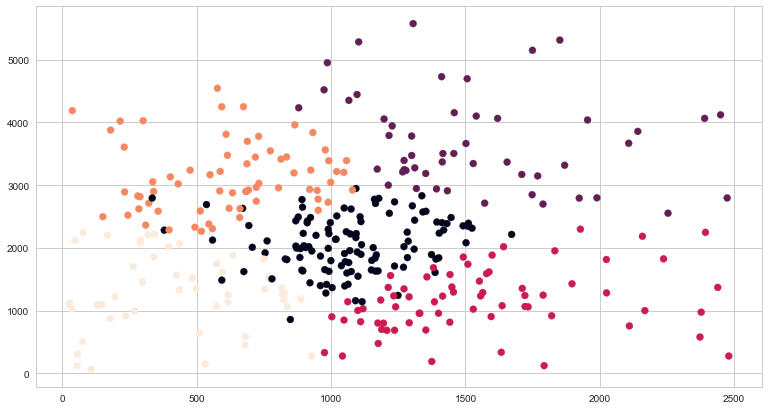

In [92]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5, random_state=0) # Fixing the RNG in kmeans
k_means.fit(people_subset)
y_pred_k = k_means.predict(people_subset)

fig = plt.figure(figsize=(13,7))
pl.scatter(people_subset['meanV'], people_subset['minD'], c=y_pred_k);

In [90]:
people_subset.describe()

,minV,maxV,meanV,minD
count,351.000000,351.000000,351.000000,351.000000
mean,859.477330,1297.052103,1055.272049,2215.204755
std,584.348289,605.492770,516.752896,1060.229835
min,10.332063,25.357569,25.357569,60.658484
25%,339.757536,919.037559,692.910408,1395.550273
50%,861.630010,1296.872881,1052.596059,2134.573905
75%,1205.984966,1734.604433,1374.087259,2900.038331
max,2479.948030,2494.242614,2479.948030,5576.198299
